# Play with Mbs and Bandpasses

In [1]:
# Using this file, we can use "import litebird_sim" even if it is not installed system-wide
import fixpythonpath

In [2]:
import litebird_sim as lbs
import numpy as np
import matplotlib.pylab as plt
import healpy as hp
import astropy

hwloc/linux: Ignoring PCI device with non-16bit domain.
Pass --enable-32bits-pci-domain to configure to support such devices
(warning: it would break the library ABI, don't enable unless really needed).


In [3]:
start_time = 0.0
imo = lbs.Imo()
sim = lbs.Simulation(
    base_path="tut01",
    start_time=start_time,
    duration_s=3600,
    random_seed=12345,
)

## One channel

In [4]:
# Initialize the channel
channel = lbs.FreqChannelInfo.from_imo(
    url="/releases/vPTEP/satellite/MFT/M1-140/channel_info", imo=imo
)

In [5]:
# Parameters of Mbs
params = lbs.MbsParameters(
    make_cmb=False,
    make_fg=True,
    fg_models=["pysm_synch_0", "pysm_freefree_1", "pysm_dust_0"],
    nside=64,
    gaussian_smooth=True,
)

In [6]:
# Create the class and run the map generation
mbs = lbs.Mbs(
    simulation=sim,
    parameters=params,
    channel_list=channel,
)
maps = mbs.run_all()[0]

[2024-02-29 15:02:21,874 INFO MPI#0000] generating and saving fg simulations
[2024-02-29 15:02:21,875 INFO MPI#0000] Retrieve data for pysm_2/synch_t_new.fits (if not cached already)
[2024-02-29 15:02:21,888 INFO MPI#0000] NSIDE = 512
[2024-02-29 15:02:21,889 INFO MPI#0000] ORDERING = RING in fits file
[2024-02-29 15:02:21,889 INFO MPI#0000] INDXSCHM = IMPLICIT
[2024-02-29 15:02:21,978 INFO MPI#0000] Retrieve data for pysm_2/synch_q_new.fits (if not cached already)
[2024-02-29 15:02:21,980 INFO MPI#0000] NSIDE = 512
[2024-02-29 15:02:21,980 INFO MPI#0000] ORDERING = RING in fits file
[2024-02-29 15:02:21,981 INFO MPI#0000] INDXSCHM = IMPLICIT
[2024-02-29 15:02:22,068 INFO MPI#0000] Retrieve data for pysm_2/synch_u_new.fits (if not cached already)
[2024-02-29 15:02:22,069 INFO MPI#0000] NSIDE = 512
[2024-02-29 15:02:22,070 INFO MPI#0000] ORDERING = RING in fits file
[2024-02-29 15:02:22,070 INFO MPI#0000] INDXSCHM = IMPLICIT
[2024-02-29 15:02:23,232 INFO MPI#0000] Sigma is 13.079556 arc

In [7]:
maps.keys()

dict_keys(['M1-140', 'Coordinates', 'Mbs_parameters'])

In [8]:
# numpy array with the healpix map
maps["M1-140"].shape

(3, 49152)

In [9]:
# Coordinates of the simulated maps
maps["Coordinates"]

<CoordinateSystem.Galactic: 2>

In [10]:
# Parameters of the Mbs simulations
maps["Mbs_parameters"]

MbsParameters(nside=64, save=False, gaussian_smooth=True, bandpass_int=False, coadd=True, parallel_mc=False, make_noise=False, nmc_noise=1, seed_noise=None, n_split=False, make_cmb=False, cmb_ps_file='', cmb_r=0.0, nmc_cmb=1, seed_cmb=None, make_fg=True, fg_models={'pysm_synch_0': 'pysm_synch_0', 'pysm_freefree_1': 'pysm_freefree_1', 'pysm_dust_0': 'pysm_dust_0'}, make_dipole=False, sun_velocity=None, output_string='date_240229', units='K_CMB', maps_in_ecliptic=False)

## Many channels

In [11]:
# Obtain the info about the instrument from the imo
instrument = lbs.InstrumentInfo.from_imo(
    url="/releases/vPTEP/satellite/MFT/instrument_info", imo=imo
)

In [12]:
# Create a list with all the channels
channels = list()
for ch in instrument.channel_names:
    print(ch)
    channels.append(
        lbs.FreqChannelInfo.from_imo(
            url="/releases/vPTEP/satellite/MFT/" + ch + "/channel_info", imo=imo
        )
    )

M1-100
M2-119
M1-140
M2-166
M1-195


In [13]:
# Same as before but using the uuids
channels = list()
for uuid in instrument.channel_objs:
    channel = lbs.FreqChannelInfo.from_imo(url=uuid, imo=imo)
    print(channel.channel)
    channels.append(channel)

M1-100
M2-119
M1-140
M2-166
M1-195


In [14]:
mbs = lbs.Mbs(
    simulation=sim,
    parameters=params,
    channel_list=channels,
)
maps = mbs.run_all()[0]

[2024-02-29 15:02:25,492 INFO MPI#0000] generating and saving fg simulations
[2024-02-29 15:02:25,493 INFO MPI#0000] Retrieve data for pysm_2/synch_t_new.fits (if not cached already)
[2024-02-29 15:02:25,494 INFO MPI#0000] NSIDE = 512
[2024-02-29 15:02:25,495 INFO MPI#0000] ORDERING = RING in fits file
[2024-02-29 15:02:25,495 INFO MPI#0000] INDXSCHM = IMPLICIT
[2024-02-29 15:02:25,574 INFO MPI#0000] Retrieve data for pysm_2/synch_q_new.fits (if not cached already)
[2024-02-29 15:02:25,576 INFO MPI#0000] NSIDE = 512
[2024-02-29 15:02:25,576 INFO MPI#0000] ORDERING = RING in fits file
[2024-02-29 15:02:25,576 INFO MPI#0000] INDXSCHM = IMPLICIT
[2024-02-29 15:02:25,656 INFO MPI#0000] Retrieve data for pysm_2/synch_u_new.fits (if not cached already)
[2024-02-29 15:02:25,657 INFO MPI#0000] NSIDE = 512
[2024-02-29 15:02:25,658 INFO MPI#0000] ORDERING = RING in fits file
[2024-02-29 15:02:25,658 INFO MPI#0000] INDXSCHM = IMPLICIT
[2024-02-29 15:02:25,778 INFO MPI#0000] Sigma is 16.052182 arc

In [15]:
for k in maps.keys():
    print(k)

M1-100
M2-119
M1-140
M2-166
M1-195
Coordinates
Mbs_parameters


## Some detectors

In [16]:
# Now we create a list of detectors
channel = lbs.FreqChannelInfo.from_imo(
    url="/releases/vPTEP/satellite/MFT/M1-140/channel_info", imo=imo
)
wafer = "M02"
orient = "Q"
dets = []
for uuid in channel.detector_objs:
    det = lbs.DetectorInfo.from_imo(url=uuid, imo=imo)
    if (det.wafer == wafer) and (det.orient == orient):
        dets.append(det)

In [17]:
# We run as before but with detector_list instead of channel_list
mbs = lbs.Mbs(
    simulation=sim,
    parameters=params,
    detector_list=dets,
)
maps = mbs.run_all()[0]

[2024-02-29 15:02:27,535 INFO MPI#0000] generating and saving fg simulations
[2024-02-29 15:02:27,536 INFO MPI#0000] Retrieve data for pysm_2/synch_t_new.fits (if not cached already)
[2024-02-29 15:02:27,538 INFO MPI#0000] NSIDE = 512
[2024-02-29 15:02:27,539 INFO MPI#0000] ORDERING = RING in fits file
[2024-02-29 15:02:27,539 INFO MPI#0000] INDXSCHM = IMPLICIT
[2024-02-29 15:02:27,617 INFO MPI#0000] Retrieve data for pysm_2/synch_q_new.fits (if not cached already)
[2024-02-29 15:02:27,618 INFO MPI#0000] NSIDE = 512
[2024-02-29 15:02:27,619 INFO MPI#0000] ORDERING = RING in fits file
[2024-02-29 15:02:27,619 INFO MPI#0000] INDXSCHM = IMPLICIT
[2024-02-29 15:02:27,697 INFO MPI#0000] Retrieve data for pysm_2/synch_u_new.fits (if not cached already)
[2024-02-29 15:02:27,699 INFO MPI#0000] NSIDE = 512
[2024-02-29 15:02:27,699 INFO MPI#0000] ORDERING = RING in fits file
[2024-02-29 15:02:27,699 INFO MPI#0000] INDXSCHM = IMPLICIT
[2024-02-29 15:02:27,816 INFO MPI#0000] Sigma is 13.079556 arc

[2024-02-29 15:02:30,333 INFO MPI#0000] Sigma is 0.000000 arcmin (0.000000 rad) 
[2024-02-29 15:02:30,334 INFO MPI#0000] -> fwhm is 0.000000 arcmin
[2024-02-29 15:02:30,421 INFO MPI#0000] Sigma is 13.079556 arcmin (0.003805 rad) 
[2024-02-29 15:02:30,422 INFO MPI#0000] -> fwhm is 30.800000 arcmin
[2024-02-29 15:02:30,423 INFO MPI#0000] Sigma is 0.000000 arcmin (0.000000 rad) 
[2024-02-29 15:02:30,423 INFO MPI#0000] -> fwhm is 0.000000 arcmin
[2024-02-29 15:02:30,524 INFO MPI#0000] Sigma is 13.079556 arcmin (0.003805 rad) 
[2024-02-29 15:02:30,524 INFO MPI#0000] -> fwhm is 30.800000 arcmin
[2024-02-29 15:02:30,525 INFO MPI#0000] Sigma is 0.000000 arcmin (0.000000 rad) 
[2024-02-29 15:02:30,526 INFO MPI#0000] -> fwhm is 0.000000 arcmin
[2024-02-29 15:02:30,625 INFO MPI#0000] Sigma is 13.079556 arcmin (0.003805 rad) 
[2024-02-29 15:02:30,626 INFO MPI#0000] -> fwhm is 30.800000 arcmin
[2024-02-29 15:02:30,627 INFO MPI#0000] Sigma is 0.000000 arcmin (0.000000 rad) 
[2024-02-29 15:02:30,627 

[2024-02-29 15:02:32,969 INFO MPI#0000] Sigma is 13.079556 arcmin (0.003805 rad) 
[2024-02-29 15:02:32,969 INFO MPI#0000] -> fwhm is 30.800000 arcmin
[2024-02-29 15:02:32,977 INFO MPI#0000] Sigma is 0.000000 arcmin (0.000000 rad) 
[2024-02-29 15:02:32,978 INFO MPI#0000] -> fwhm is 0.000000 arcmin
[2024-02-29 15:02:33,153 INFO MPI#0000] Sigma is 13.079556 arcmin (0.003805 rad) 
[2024-02-29 15:02:33,153 INFO MPI#0000] -> fwhm is 30.800000 arcmin
[2024-02-29 15:02:33,156 INFO MPI#0000] Sigma is 0.000000 arcmin (0.000000 rad) 
[2024-02-29 15:02:33,156 INFO MPI#0000] -> fwhm is 0.000000 arcmin
[2024-02-29 15:02:33,241 INFO MPI#0000] Sigma is 13.079556 arcmin (0.003805 rad) 
[2024-02-29 15:02:33,241 INFO MPI#0000] -> fwhm is 30.800000 arcmin
[2024-02-29 15:02:33,243 INFO MPI#0000] Sigma is 0.000000 arcmin (0.000000 rad) 
[2024-02-29 15:02:33,244 INFO MPI#0000] -> fwhm is 0.000000 arcmin
[2024-02-29 15:02:33,353 INFO MPI#0000] Sigma is 13.079556 arcmin (0.003805 rad) 
[2024-02-29 15:02:33,354

[2024-02-29 15:02:35,495 INFO MPI#0000] -> fwhm is 0.000000 arcmin
[2024-02-29 15:02:35,591 INFO MPI#0000] Sigma is 13.079556 arcmin (0.003805 rad) 
[2024-02-29 15:02:35,593 INFO MPI#0000] -> fwhm is 30.800000 arcmin
[2024-02-29 15:02:35,595 INFO MPI#0000] Sigma is 0.000000 arcmin (0.000000 rad) 
[2024-02-29 15:02:35,597 INFO MPI#0000] -> fwhm is 0.000000 arcmin
[2024-02-29 15:02:35,697 INFO MPI#0000] Sigma is 13.079556 arcmin (0.003805 rad) 
[2024-02-29 15:02:35,698 INFO MPI#0000] -> fwhm is 30.800000 arcmin
[2024-02-29 15:02:35,699 INFO MPI#0000] Sigma is 0.000000 arcmin (0.000000 rad) 
[2024-02-29 15:02:35,699 INFO MPI#0000] -> fwhm is 0.000000 arcmin
[2024-02-29 15:02:35,801 INFO MPI#0000] Sigma is 13.079556 arcmin (0.003805 rad) 
[2024-02-29 15:02:35,802 INFO MPI#0000] -> fwhm is 30.800000 arcmin
[2024-02-29 15:02:35,803 INFO MPI#0000] Sigma is 0.000000 arcmin (0.000000 rad) 
[2024-02-29 15:02:35,810 INFO MPI#0000] -> fwhm is 0.000000 arcmin
[2024-02-29 15:02:35,900 INFO MPI#0000]

[2024-02-29 15:02:38,207 INFO MPI#0000] -> fwhm is 30.800000 arcmin
[2024-02-29 15:02:38,208 INFO MPI#0000] Sigma is 0.000000 arcmin (0.000000 rad) 
[2024-02-29 15:02:38,208 INFO MPI#0000] -> fwhm is 0.000000 arcmin
[2024-02-29 15:02:38,300 INFO MPI#0000] Sigma is 13.079556 arcmin (0.003805 rad) 
[2024-02-29 15:02:38,300 INFO MPI#0000] -> fwhm is 30.800000 arcmin
[2024-02-29 15:02:38,301 INFO MPI#0000] Sigma is 0.000000 arcmin (0.000000 rad) 
[2024-02-29 15:02:38,302 INFO MPI#0000] -> fwhm is 0.000000 arcmin
[2024-02-29 15:02:38,387 INFO MPI#0000] Sigma is 13.079556 arcmin (0.003805 rad) 
[2024-02-29 15:02:38,387 INFO MPI#0000] -> fwhm is 30.800000 arcmin
[2024-02-29 15:02:38,390 INFO MPI#0000] Sigma is 0.000000 arcmin (0.000000 rad) 
[2024-02-29 15:02:38,391 INFO MPI#0000] -> fwhm is 0.000000 arcmin
[2024-02-29 15:02:38,482 INFO MPI#0000] Sigma is 13.079556 arcmin (0.003805 rad) 
[2024-02-29 15:02:38,482 INFO MPI#0000] -> fwhm is 30.800000 arcmin
[2024-02-29 15:02:38,485 INFO MPI#0000

[2024-02-29 15:02:40,794 INFO MPI#0000] -> fwhm is 0.000000 arcmin
[2024-02-29 15:02:40,891 INFO MPI#0000] Sigma is 13.079556 arcmin (0.003805 rad) 
[2024-02-29 15:02:40,891 INFO MPI#0000] -> fwhm is 30.800000 arcmin
[2024-02-29 15:02:40,892 INFO MPI#0000] Sigma is 0.000000 arcmin (0.000000 rad) 
[2024-02-29 15:02:40,893 INFO MPI#0000] -> fwhm is 0.000000 arcmin
[2024-02-29 15:02:40,983 INFO MPI#0000] Sigma is 13.079556 arcmin (0.003805 rad) 
[2024-02-29 15:02:40,983 INFO MPI#0000] -> fwhm is 30.800000 arcmin
[2024-02-29 15:02:40,984 INFO MPI#0000] Sigma is 0.000000 arcmin (0.000000 rad) 
[2024-02-29 15:02:40,985 INFO MPI#0000] -> fwhm is 0.000000 arcmin
[2024-02-29 15:02:41,078 INFO MPI#0000] Sigma is 13.079556 arcmin (0.003805 rad) 
[2024-02-29 15:02:41,078 INFO MPI#0000] -> fwhm is 30.800000 arcmin
[2024-02-29 15:02:41,079 INFO MPI#0000] Sigma is 0.000000 arcmin (0.000000 rad) 
[2024-02-29 15:02:41,079 INFO MPI#0000] -> fwhm is 0.000000 arcmin
[2024-02-29 15:02:41,177 INFO MPI#0000]

[2024-02-29 15:02:43,373 INFO MPI#0000] Sigma is 0.000000 arcmin (0.000000 rad) 
[2024-02-29 15:02:43,373 INFO MPI#0000] -> fwhm is 0.000000 arcmin
[2024-02-29 15:02:43,477 INFO MPI#0000] Sigma is 13.079556 arcmin (0.003805 rad) 
[2024-02-29 15:02:43,477 INFO MPI#0000] -> fwhm is 30.800000 arcmin
[2024-02-29 15:02:43,478 INFO MPI#0000] Sigma is 0.000000 arcmin (0.000000 rad) 
[2024-02-29 15:02:43,479 INFO MPI#0000] -> fwhm is 0.000000 arcmin
[2024-02-29 15:02:43,578 INFO MPI#0000] Sigma is 13.079556 arcmin (0.003805 rad) 
[2024-02-29 15:02:43,579 INFO MPI#0000] -> fwhm is 30.800000 arcmin
[2024-02-29 15:02:43,579 INFO MPI#0000] Sigma is 0.000000 arcmin (0.000000 rad) 
[2024-02-29 15:02:43,580 INFO MPI#0000] -> fwhm is 0.000000 arcmin
[2024-02-29 15:02:43,678 INFO MPI#0000] Sigma is 13.079556 arcmin (0.003805 rad) 
[2024-02-29 15:02:43,678 INFO MPI#0000] -> fwhm is 30.800000 arcmin
[2024-02-29 15:02:43,679 INFO MPI#0000] Sigma is 0.000000 arcmin (0.000000 rad) 
[2024-02-29 15:02:43,679 

[2024-02-29 15:02:46,043 INFO MPI#0000] Sigma is 13.079556 arcmin (0.003805 rad) 
[2024-02-29 15:02:46,043 INFO MPI#0000] -> fwhm is 30.800000 arcmin
[2024-02-29 15:02:46,055 INFO MPI#0000] Sigma is 0.000000 arcmin (0.000000 rad) 
[2024-02-29 15:02:46,056 INFO MPI#0000] -> fwhm is 0.000000 arcmin
[2024-02-29 15:02:46,137 INFO MPI#0000] Sigma is 13.079556 arcmin (0.003805 rad) 
[2024-02-29 15:02:46,138 INFO MPI#0000] -> fwhm is 30.800000 arcmin
[2024-02-29 15:02:46,138 INFO MPI#0000] Sigma is 0.000000 arcmin (0.000000 rad) 
[2024-02-29 15:02:46,139 INFO MPI#0000] -> fwhm is 0.000000 arcmin
[2024-02-29 15:02:46,229 INFO MPI#0000] Sigma is 13.079556 arcmin (0.003805 rad) 
[2024-02-29 15:02:46,230 INFO MPI#0000] -> fwhm is 30.800000 arcmin
[2024-02-29 15:02:46,231 INFO MPI#0000] Sigma is 0.000000 arcmin (0.000000 rad) 
[2024-02-29 15:02:46,231 INFO MPI#0000] -> fwhm is 0.000000 arcmin
[2024-02-29 15:02:46,319 INFO MPI#0000] Sigma is 13.079556 arcmin (0.003805 rad) 
[2024-02-29 15:02:46,320

In [18]:
for k in maps.keys():
    print(k)

001_002_030_00A_140_T
001_002_030_00A_140_B
001_002_031_15B_140_T
001_002_031_00B_140_B
001_002_022_15A_140_T
001_002_022_00A_140_B
001_002_039_15A_140_T
001_002_039_00A_140_B
001_002_023_15B_140_T
001_002_023_00B_140_B
001_002_015_15A_140_T
001_002_015_00A_140_B
001_002_047_15A_140_T
001_002_047_00A_140_B
001_002_040_15B_140_T
001_002_040_00B_140_B
001_002_016_15B_140_T
001_002_016_00B_140_B
001_002_009_15A_140_T
001_002_009_00A_140_B
001_002_006_30B_140_T
001_002_006_00B_140_B
001_002_012_30B_140_T
001_002_012_00B_140_B
001_002_019_30B_140_T
001_002_019_00B_140_B
001_002_027_30B_140_T
001_002_027_00B_140_B
001_002_036_30B_140_T
001_002_036_00B_140_B
001_002_044_15B_140_T
001_002_044_00B_140_B
001_002_051_15B_140_T
001_002_051_00B_140_B
001_002_054_15A_140_T
001_002_054_00A_140_B
001_002_048_15B_140_T
001_002_048_00B_140_B
001_002_034_15A_140_T
001_002_034_00A_140_B
001_002_010_15B_140_T
001_002_010_00B_140_B
001_002_004_15A_140_T
001_002_004_00A_140_B
001_002_001_30B_140_T
001_002_00

## Now integrating over a top-hat bandpass

In [19]:
channel = lbs.FreqChannelInfo.from_imo(
    url="/releases/vPTEP/satellite/MFT/M1-140/channel_info", imo=imo
)

In [20]:
# We generate maps with an without band integration
params = lbs.MbsParameters(
    make_cmb=False,
    make_fg=True,
    fg_models=["pysm_synch_0", "pysm_freefree_1", "pysm_dust_0"],
    nside=64,
    gaussian_smooth=True,
)
mbs = lbs.Mbs(
    simulation=sim,
    parameters=params,
    channel_list=channel,
)
mapsnoint = mbs.run_all()[0]

params = lbs.MbsParameters(
    make_cmb=False,
    make_fg=True,
    fg_models=["pysm_synch_0", "pysm_freefree_1", "pysm_dust_0"],
    nside=64,
    gaussian_smooth=True,
    bandpass_int=True,
)
mbs = lbs.Mbs(
    simulation=sim,
    parameters=params,
    channel_list=channel,
)
mapsint = mbs.run_all()[0]

[2024-02-29 15:02:48,374 INFO MPI#0000] generating and saving fg simulations
[2024-02-29 15:02:48,375 INFO MPI#0000] Retrieve data for pysm_2/synch_t_new.fits (if not cached already)
[2024-02-29 15:02:48,376 INFO MPI#0000] NSIDE = 512
[2024-02-29 15:02:48,376 INFO MPI#0000] ORDERING = RING in fits file
[2024-02-29 15:02:48,377 INFO MPI#0000] INDXSCHM = IMPLICIT
[2024-02-29 15:02:48,467 INFO MPI#0000] Retrieve data for pysm_2/synch_q_new.fits (if not cached already)
[2024-02-29 15:02:48,468 INFO MPI#0000] NSIDE = 512
[2024-02-29 15:02:48,469 INFO MPI#0000] ORDERING = RING in fits file
[2024-02-29 15:02:48,469 INFO MPI#0000] INDXSCHM = IMPLICIT
[2024-02-29 15:02:48,546 INFO MPI#0000] Retrieve data for pysm_2/synch_u_new.fits (if not cached already)
[2024-02-29 15:02:48,548 INFO MPI#0000] NSIDE = 512
[2024-02-29 15:02:48,548 INFO MPI#0000] ORDERING = RING in fits file
[2024-02-29 15:02:48,549 INFO MPI#0000] INDXSCHM = IMPLICIT
[2024-02-29 15:02:48,675 INFO MPI#0000] Sigma is 13.079556 arc

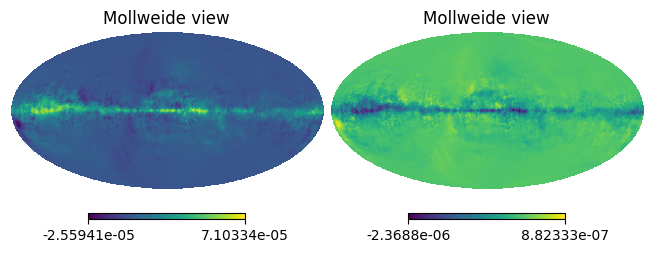

In [21]:
hp.mollview(mapsint["M1-140"][1], sub=121)
hp.mollview((mapsnoint["M1-140"] - mapsint["M1-140"])[1], sub=122)

## Now with a customized bandpass

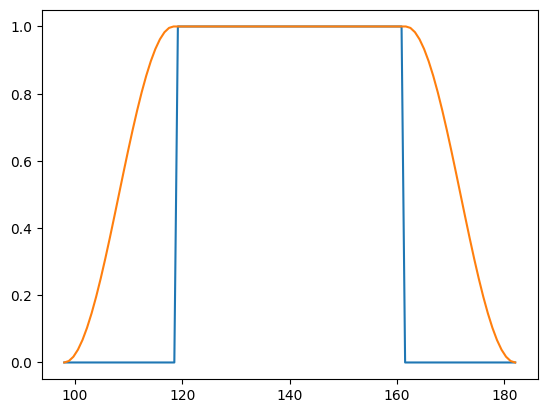

In [22]:
# We change the shape of the bands, in channel1 top-hat in channel2 top-hat with cosine tails

channel1 = lbs.FreqChannelInfo.from_imo(
    url="/releases/vPTEP/satellite/MFT/M1-140/channel_info", imo=imo
)

band = lbs.BandPassInfo(
    bandcenter_ghz=channel1.bandcenter_ghz,
    bandwidth_ghz=channel1.bandwidth_ghz,
    bandtype="top-hat-cosine",
    nsamples_inband=100,
)
channel2 = lbs.FreqChannelInfo.from_imo(
    url="/releases/vPTEP/satellite/MFT/M1-140/channel_info", imo=imo
)
channel2.band = band

plt.plot(channel1.band.freqs_ghz, channel1.band.weights, label="Ideal band")
plt.plot(channel2.band.freqs_ghz, channel2.band.weights, label="Ideal band")

In [23]:
# Here we do the comparison
params = lbs.MbsParameters(
    make_cmb=False,
    make_fg=True,
    fg_models=["pysm_synch_0", "pysm_freefree_1", "pysm_dust_0"],
    nside=64,
    gaussian_smooth=True,
    bandpass_int=True,
)
mbs = lbs.Mbs(
    simulation=sim,
    parameters=params,
    channel_list=channel1,
)
mapsth = mbs.run_all()[0]

mbs = lbs.Mbs(
    simulation=sim,
    parameters=params,
    channel_list=channel2,
)
mapsthc = mbs.run_all()[0]

[2024-02-29 15:02:50,333 INFO MPI#0000] generating and saving fg simulations
[2024-02-29 15:02:50,334 INFO MPI#0000] Retrieve data for pysm_2/synch_t_new.fits (if not cached already)
[2024-02-29 15:02:50,336 INFO MPI#0000] NSIDE = 512
[2024-02-29 15:02:50,336 INFO MPI#0000] ORDERING = RING in fits file
[2024-02-29 15:02:50,337 INFO MPI#0000] INDXSCHM = IMPLICIT
[2024-02-29 15:02:50,425 INFO MPI#0000] Retrieve data for pysm_2/synch_q_new.fits (if not cached already)
[2024-02-29 15:02:50,427 INFO MPI#0000] NSIDE = 512
[2024-02-29 15:02:50,427 INFO MPI#0000] ORDERING = RING in fits file
[2024-02-29 15:02:50,428 INFO MPI#0000] INDXSCHM = IMPLICIT
[2024-02-29 15:02:50,514 INFO MPI#0000] Retrieve data for pysm_2/synch_u_new.fits (if not cached already)
[2024-02-29 15:02:50,516 INFO MPI#0000] NSIDE = 512
[2024-02-29 15:02:50,516 INFO MPI#0000] ORDERING = RING in fits file
[2024-02-29 15:02:50,516 INFO MPI#0000] INDXSCHM = IMPLICIT
[2024-02-29 15:02:50,624 INFO MPI#0000] Removing 64/128 points

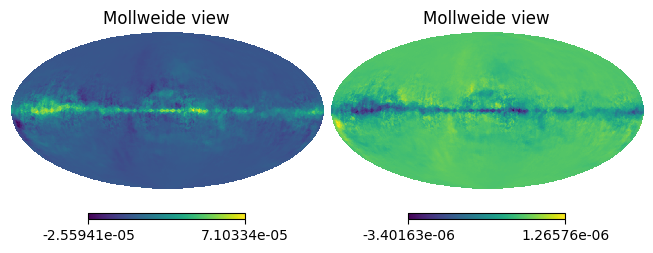

In [24]:
hp.mollview(mapsth["M1-140"][1], sub=121)
hp.mollview((mapsth["M1-140"] - mapsthc["M1-140"])[1], sub=122)

## Scan the sky

In [25]:
# Now we do a simple simulation of 1 hour with 4 detectors
telescope = "MFT"
channel = "M1-140"
detlist = [
    "001_004_060_30A_140_T",
    "001_003_000_00A_140_B",
    "001_003_001_00B_140_T",
    "001_003_002_45A_140_B",
]

In [26]:
start_time = 0.0
imo = lbs.Imo()
sim = lbs.Simulation(
    base_path="./tut01",
    start_time=start_time,
    duration_s=3600,
    random_seed=12345,
)

Can't resample if no sampler is built and/or provided, initializing the sampler and interpolating the band


/home/serenagiardiello/lbs/litebird_sim/litebird_sim/bandpasses.py:271: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  sp.integrate.quad(b, a=self.freqs_ghz.min(), b=inu)[0]
/home/serenagiardiello/lbs/litebird_sim/litebird_sim/bandpasses.py:271: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  sp.integrate.quad(b, a=self.freqs_ghz.min(), b=inu)[0]


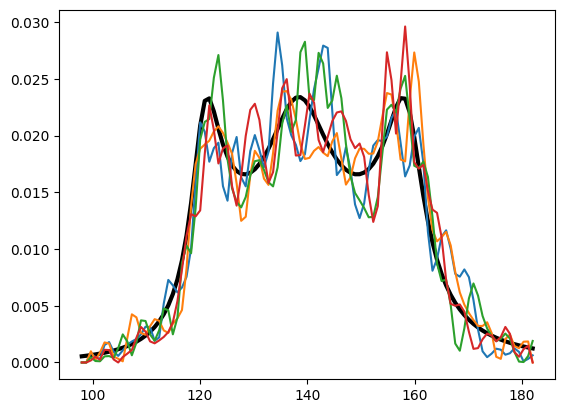

In [27]:
# Load the definition of the instrument (LFT)
sim.set_instrument(
    lbs.InstrumentInfo.from_imo(
        imo,
        f"/releases/vPTEP/satellite/{telescope}/instrument_info",
    )
)

channelinfo = lbs.FreqChannelInfo.from_imo(
    imo, f"/releases/vPTEP/satellite/{telescope}/{channel}/channel_info"
)

band = lbs.BandPassInfo(
    bandcenter_ghz=channelinfo.bandcenter_ghz,
    bandwidth_ghz=channelinfo.bandwidth_ghz,
    bandtype="cheby",
    nsamples_inband=100,
    normalize=True,
)

plt.plot(band.freqs_ghz, band.weights, lw=3, color="k")

dets = []
for namedet in detlist:
    det = lbs.DetectorInfo.from_imo(
        url=f"/releases/vPTEP/satellite/{telescope}/{channel}/{namedet}/detector_info",
        imo=imo,
    )
    det.quat = [0.0, 0.0, 0.0, 1.0]
    det.band = band
    det.fwhm_arcmin *= np.random.normal(1.0, 0.01)
    det.band.weights = band.bandpass_resampling()
    dets.append(det)
    plt.plot(band.freqs_ghz, det.band.weights)

In [28]:
sim.set_scanning_strategy(imo_url=f"/releases/vPTEP/satellite/scanning_parameters/")

sim.create_observations(
    detectors=dets,
    n_blocks_det=1,
    n_blocks_time=1,  # blocks different from one if parallelizing
)

In [29]:
params = lbs.MbsParameters(
    make_cmb=False,
    make_fg=True,
    fg_models=["pysm_synch_0", "pysm_freefree_1", "pysm_dust_0"],
    nside=64,
    gaussian_smooth=True,
    bandpass_int=True,
)
mbs = lbs.Mbs(
    simulation=sim,
    parameters=params,
    detector_list=dets,
)
maps = mbs.run_all()[0]

[2024-02-29 15:02:54,197 INFO MPI#0000] generating and saving fg simulations
[2024-02-29 15:02:54,198 INFO MPI#0000] Retrieve data for pysm_2/synch_t_new.fits (if not cached already)
[2024-02-29 15:02:54,200 INFO MPI#0000] NSIDE = 512
[2024-02-29 15:02:54,200 INFO MPI#0000] ORDERING = RING in fits file
[2024-02-29 15:02:54,200 INFO MPI#0000] INDXSCHM = IMPLICIT
[2024-02-29 15:02:54,287 INFO MPI#0000] Retrieve data for pysm_2/synch_q_new.fits (if not cached already)
[2024-02-29 15:02:54,288 INFO MPI#0000] NSIDE = 512
[2024-02-29 15:02:54,289 INFO MPI#0000] ORDERING = RING in fits file
[2024-02-29 15:02:54,289 INFO MPI#0000] INDXSCHM = IMPLICIT
[2024-02-29 15:02:54,368 INFO MPI#0000] Retrieve data for pysm_2/synch_u_new.fits (if not cached already)
[2024-02-29 15:02:54,369 INFO MPI#0000] NSIDE = 512
[2024-02-29 15:02:54,370 INFO MPI#0000] ORDERING = RING in fits file
[2024-02-29 15:02:54,370 INFO MPI#0000] INDXSCHM = IMPLICIT
[2024-02-29 15:02:54,463 INFO MPI#0000] Removing 97/100 points

In [30]:
sim.set_hwp(
    lbs.IdealHWP(
        sim.instrument.hwp_rpm * 2 * np.pi / 60,
    ),
)
sim.compute_pointings()

In [31]:
sim.fill_tods(maps)

Text(0, 0.5, 'Signal [K]')

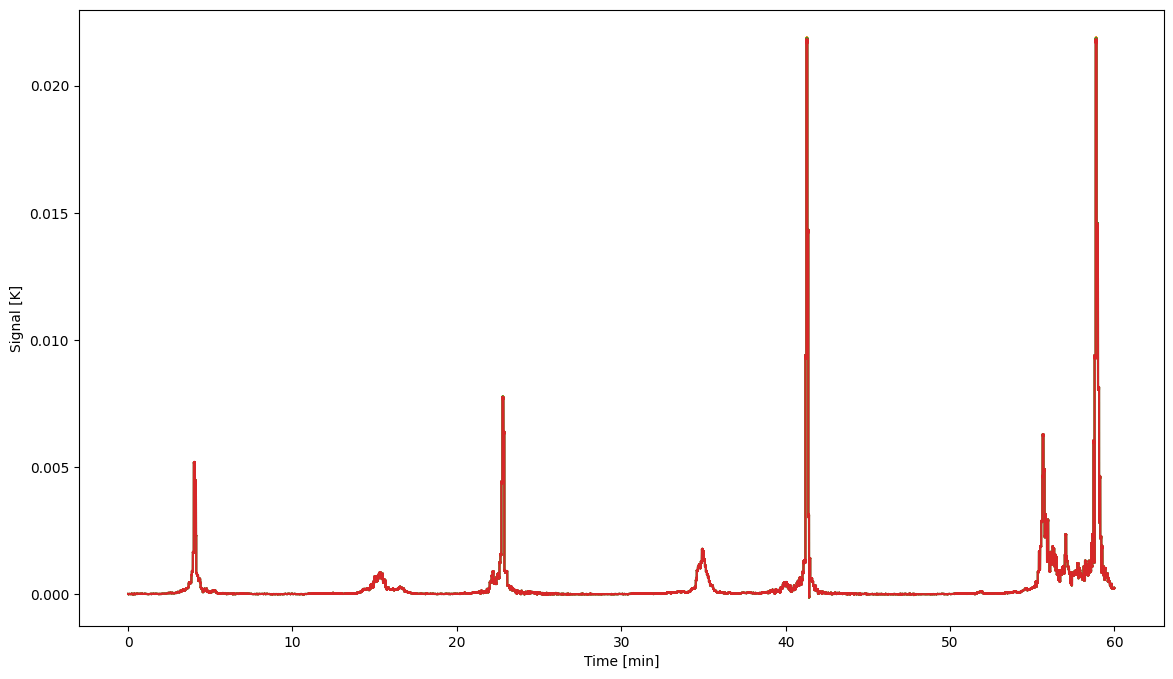

In [32]:
times_min = (sim.observations[0].get_times() - sim.observations[0].start_time) / 60.0
plt.figure(figsize=(14, 8))
plt.plot(times_min, sim.observations[0].tod[0])
plt.plot(times_min, sim.observations[0].tod[1])
plt.plot(times_min, sim.observations[0].tod[2])
plt.plot(times_min, sim.observations[0].tod[3])

plt.xlabel("Time [min]")
plt.ylabel("Signal [K]")

Text(0, 0.5, '$\\Delta$ Signal [K]')

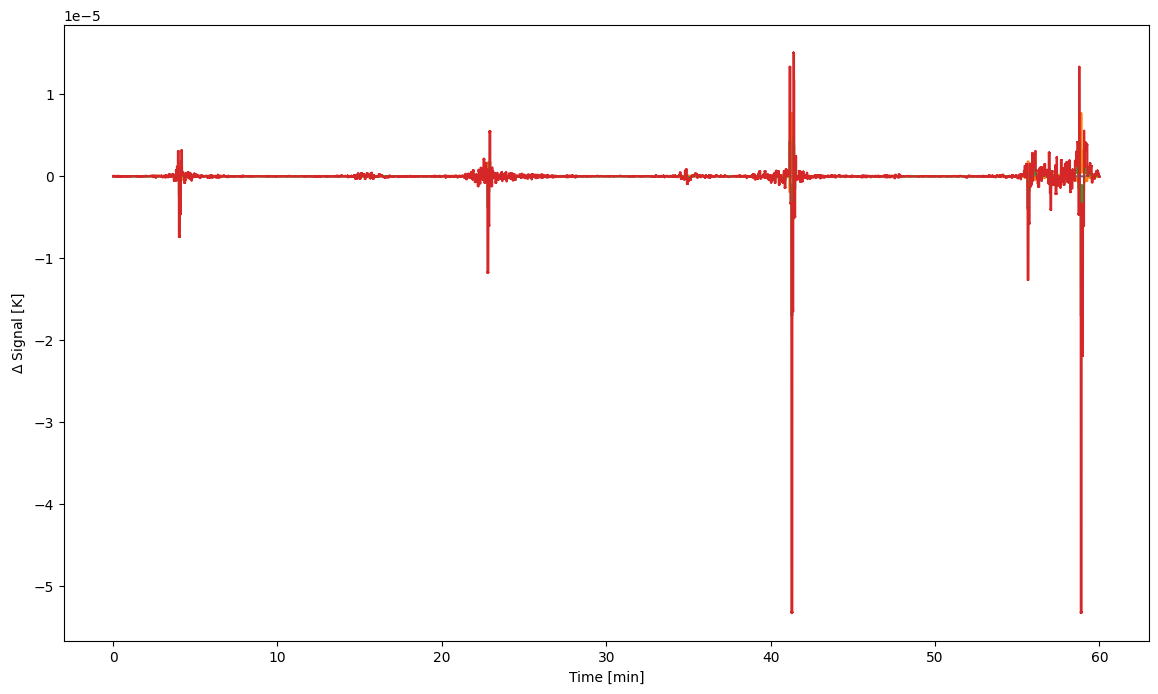

In [33]:
plt.figure(figsize=(14, 8))
plt.plot(times_min, sim.observations[0].tod[0] - sim.observations[0].tod[0])
plt.plot(times_min, sim.observations[0].tod[1] - sim.observations[0].tod[0])
plt.plot(times_min, sim.observations[0].tod[2] - sim.observations[0].tod[0])
plt.plot(times_min, sim.observations[0].tod[3] - sim.observations[0].tod[0])

plt.xlabel("Time [min]")
plt.ylabel(r"$\Delta$ Signal [K]")